Decision Tree

Decision tree is a supervised learning algorithm that is used for both classification and regression problems. It models decsions as a tree-like structure where internal nodes represent attribute test, branches represent attribute value and leaf nodes represent final decsions or predictions.

Information Gain and Gini Index

These are attribute selections measures used by decsion tree.

Information Gain tells us how useful a feature is for splliting data into two groups. It measures how much the uncertainity decreases after the split.

Entropy is the measure of uncertainity of a random variable, it characterizes the impurity of an arbitary collection of examples. The higher the entropy mrtion the information content.

Gini Index is a metric used to measure how often a randomly chosen element would be incorrectly identified. 

For example, if we have a group of people where all bought the product (100% “Yes”), the Gini Index is 0, indicating perfect purity. But if the group has an equal mix of “Yes” and “No”, the Gini Index would be 0.5, showing higher impurity or uncertainty.


In [34]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import sys
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline  


In [35]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [38]:
#Dropping unwanted columns 
df = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis='columns')
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [39]:
#Missing value analysis
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [40]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [41]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500
...,...,...,...,...,...
886,0,2,1,27.0,13.0000
887,1,1,0,19.0,30.0000
888,0,3,0,NaN,23.4500
889,1,1,1,26.0,30.0000


In [44]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df['Fare'] = sc.fit_transform(df[['Fare']])
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,-0.502445
1,1,1,0,38.0,0.786845
2,1,3,0,26.0,-0.488854
3,1,1,0,35.0,0.420730
4,0,3,1,35.0,-0.486337
...,...,...,...,...,...
886,0,2,1,27.0,-0.386671
887,1,1,0,19.0,-0.044381
888,0,3,0,NaN,-0.176263
889,1,1,1,26.0,-0.044381


In [45]:
#filling the null with mean value of age
df.Age = df.Age.fillna(df.Age.mean())
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [46]:
#Setting and inputs and target
X= df.drop(['Survived'],axis='columns')
y = df.Survived


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [48]:
model = tree.DecisionTreeClassifier()

model =model.fit(X_train,y_train)

In [49]:
model.score(X_test,y_test)

0.753731343283582

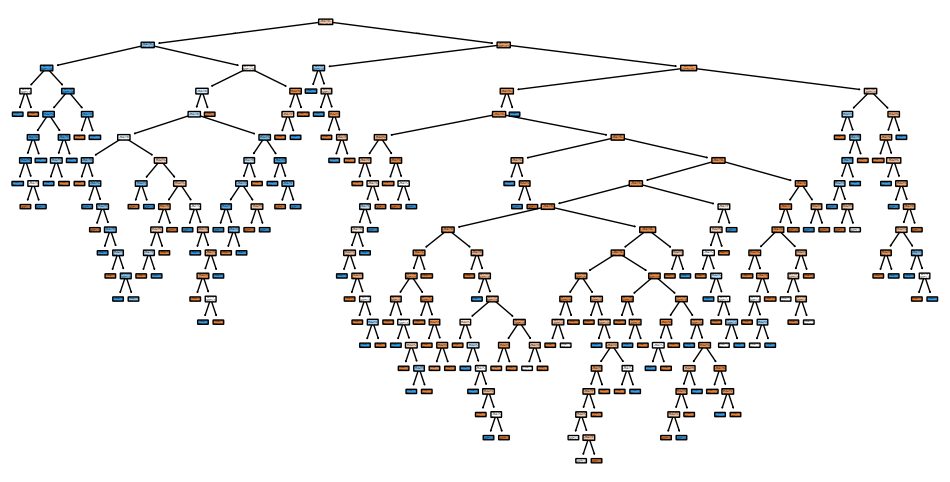

In [50]:

plt.figure(figsize=(12,6))
tree.plot_tree(model,feature_names= X_train.columns,
         filled = True,
         rounded = True);

In [51]:
y_pred = model.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,log_loss
accuracy_score(y_test,y_pred)

0.753731343283582

In [53]:
#Grid Search Cross Validation

from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth':range(1,11),
              'min_samples_split':[10,20,30,40,50,60]}]
grid_search = GridSearchCV(estimator=model,
                          param_grid=parameters,
                          scoring='accuracy',
                          cv=10,
                          n_jobs=-1)
grid_search = grid_search.fit(X_train,y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8138248847926267
{'max_depth': 3, 'min_samples_split': 10}


In [57]:
#applying the decision tree with best parameters

model_pruned = tree.DecisionTreeClassifier(max_depth=3,min_samples_split=10)
model_pruned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=10)

In [77]:
y_pred_pruned = model_pruned.predict(X_test)

In [78]:
accuracy_score(y_test,y_pred_pruned)

0.8059701492537313

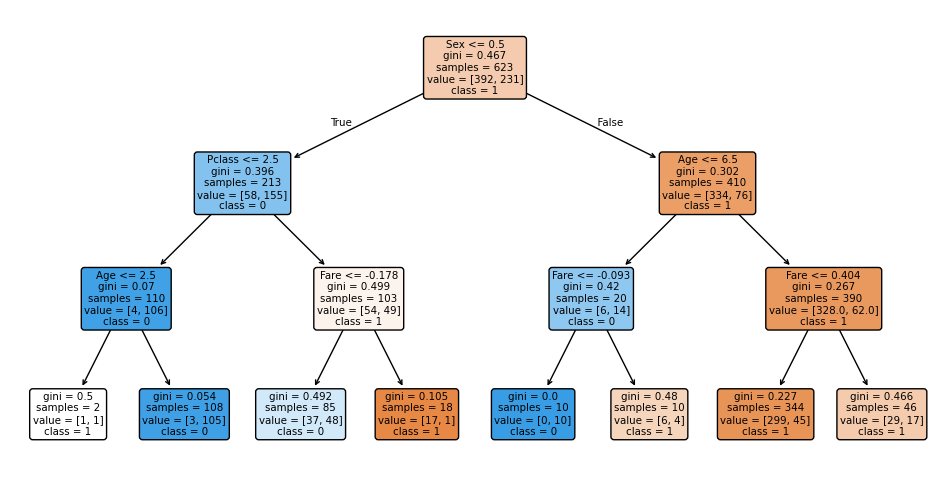

In [80]:

plt.figure(figsize=(12,6))
tree.plot_tree(model_pruned,feature_names= X_train.columns, 
               class_names=y_train.unique().astype(str),
         filled = True,
         rounded = True);

In [89]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['model_name','Accuracy Score','Precision Score','Recall Score','AUC Score','f1 Score'])

def update_score_card(y_test,y_pred,model_name,y_pred_proba=None):

    global score_card
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
       
    auc = roc_auc_score(y_test, y_pred_proba[:, 1]) if y_pred_proba is not None else None

    scores = pd.DataFrame([{
        'model_name':model_name,
        'Accuracy score': accuracy,
        'Precision score':precision,
        'Recall score':recall,
        'f1 score':f1,
        'AUC score':auc
    }])
    
    score_card = pd.concat([score_card,scores],ignore_index=True)

In [93]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_auc_score, f1_score
score_card = pd.DataFrame(columns=['model_name', 'Accuracy Score', 'Precision Score', 
                                   'Recall Score', 'AUC Score', 'f1 Score'])

def update_score_card(y_test, y_pred, model_name, y_pred_proba=None):
    global score_card  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Compute AUC only if y_pred_proba is provided
    auc = roc_auc_score(y_test, y_pred_proba[:, 1]) if y_pred_proba is not None else None

    scores = pd.DataFrame([{
        'model_name': model_name,
        'Accuracy Score': accuracy,  # Fixed capitalization
        'Precision Score': precision,
        'Recall Score': recall,
        'f1 Score': f1,
        'AUC Score': auc
    }])

    score_card = pd.concat([score_card, scores], ignore_index=True)

In [94]:
update_score_card(y_test,y_pred,'initial_model')

C:\Users\Dimple\AppData\Local\Temp\ipykernel_37268\2672591907.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  score_card = pd.concat([score_card, scores], ignore_index=True)


In [95]:
update_score_card(y_test,y_pred_pruned,'pruned_model')

In [97]:
score_card

,model_name,Accuracy Score,Precision Score,Recall Score,AUC Score,f1 Score
0,initial_model,0.753731,0.718447,0.666667,None,0.691589
1,pruned_model,0.805970,0.817204,0.684685,None,0.745098
